# Grafy

Do analizy grafów stosujemy popularną bibliotekę [networkx](https://networkx.github.io). Niniejszy kod został przygotowany z wersją 2.5 tego oprogramowania. Uwaga: wyższe wersje **networkx** niekoniecznie muszą być kompatybilne. 

In [1]:
import networkx as nx  # popularna biblioteka do analizy grafów
from networkx.algorithms import approximation as nalg   # algorytmy na grafach
print("wersja:", nx.__version__)

wersja: 2.5


Pozostałe używane biblioteki są standardowe:

In [2]:
import numpy as np  # numeryka

import matplotlib.pyplot as plt  # grafika
import matplotlib.colors as colors
from matplotlib.patches import FancyArrowPatch, Circle

Ustawiamy domyślne parametry dla rozmiaru i rozdzielczości wykresów:

In [3]:
plt.rcParams["figure.figsize"] = (3,2.3)  # rozmiar x i y w calach
plt.rcParams["figure.dpi"] = 120          # rozdzielczość dpi

## Rozgrzewka

Zaczynamy od tworzenia i rysowania bardzo prostych grafów. Podstawowe definicje można znaleźć w **rozdz. [5.1]**.

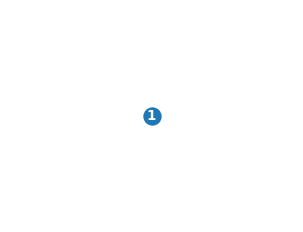

In [4]:
G = nx.Graph()  # graf pusty

G.add_node("1") # dodanie wierzchołka "1"

# narysuj graf z parametrami grafiki
nx.draw_networkx(G,node_size=100,font_size=8,font_color='white',font_weight='bold')
plt.axis('off'); # usuń ramkę

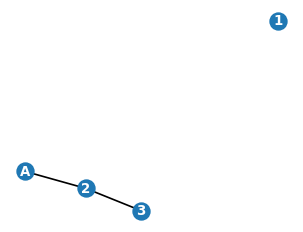

In [5]:
# dodaj więcej wierzchołków
G.add_node('A')          # pojedynczy wierzchołek
G.add_nodes_from([2, 3]) # zakres wierzchołków

# dodaj krawędzie
G.add_edge(2,'A') # łączy wierzchołek 2 z 'A' itd.
G.add_edge(2, 3)

# narysuj graf z parametrami grafiki
nx.draw_networkx(G,node_size=100,font_size=8,font_color='white',font_weight='bold')
plt.axis('off');                     # usuń ramkę

```{admonition} Rozłożenie wierzchołków
:class: note

Jeśli wykonamy powyższą komórkę ponownie, układ wierzchołów będzie inny. Wynika to stąd, że **networkx** ustawia je losowo (dla danego typu layoutu, o czym póżniej), więc grafika jest za każdym razem inna.
```

Dla danego grafu możemy "wyłowić" jego wierzchołki i krawędzie:

In [6]:
list(nx.nodes(G))

['1', 'A', 2, 3]

In [7]:
list(nx.edges(G))

[('A', 2), (2, 3)]

Możemy też znaleźć stopnie wierzchołków

In [8]:
list(nx.degree(G)) # stopnie wierzchołków

[('1', 0), ('A', 1), (2, 2), (3, 1)]

i ich histogram:

In [9]:
nx.degree_histogram(G) # histogram stopni wierzchołków

[1, 2, 1]

Powyższe oznacza, że w $G$ mamy jeden wierzchołek stopnia 0 (izolowany), dwa stopnia 1 i jeden stopnia 2.

Możemy też zadawać położenie wierzchołków na płaszczyżnie, co jest bardzo przydatne w rysowaniu grafów:

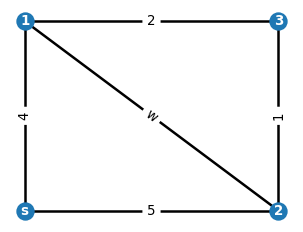

In [10]:
G=nx.Graph()  # inicjalizacja - graf pusty

# zadajemy położenie i etykiety wierzchołków
G.add_node(0,pos=(0,0),label='s')
G.add_node(1,pos=(0,1),label='1')
G.add_node(2,pos=(1,0),label='2')
G.add_node(3,pos=(1,1),label='3')

# nadajemy krawędziom wagi
G.add_edge(1,2, weight="w")
G.add_edge(0,2, weight=5)
G.add_edge(1,3, weight=2)
G.add_edge(2,3, weight=1)
G.add_edge(0,1, weight=4)

# wyciągamy atrybuty grafu
pos = nx.get_node_attributes(G,'pos')        # położenia wierzchołków
labels = nx.get_node_attributes(G,'label')   # etykiety wierzchołków
weights = nx.get_edge_attributes(G,'weight') # wagi krawędzi


# narysuj wierzchołki
nx.draw_networkx_nodes(G,pos,node_size=100)
nx.draw_networkx_labels(G,pos,labels,font_color='white',font_weight='bold',font_size=8)

# narysuj krawędzie, tutaj etykiety utożsamiamy z wagami (edge_labels=weights)
nx.draw_networkx_edges(G,pos,width=1.5)
nx.draw_networkx_edge_labels(G,pos,edge_labels=weights,font_size=8)

plt.axis('off');                             # usuń ramkę

Biblioteka **networkx** posiada bardzo wiele funkcji działających na grafach. Poniżej ukazujemy kilka z nich. 

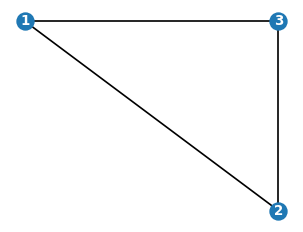

In [11]:
# podgraf grafu G, zawierający wierzchołki 1,2,3
nx.draw_networkx(nx.subgraph(G,[1,2,3]),pos,labels,node_size=100,
                 font_color='white',font_weight='bold',font_size=8)
plt.axis('off');                    

Zauważmy, że rozmieszenie wierzchołków w powyższym podgrafie jest takie samo jak w $G$, dzięki użyciu atrybutu **pos**.

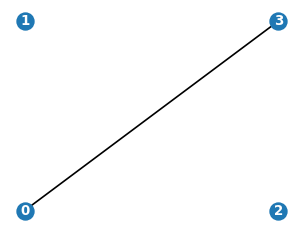

In [12]:
# uzupełnienie (do grafu pełnego)

nx.draw_networkx(nx.complement(G),pos,labels,node_size=100,
                 font_color='white',font_weight='bold',font_size=8)
plt.axis('off');                   

Istotnie, dodanie powyższego grafu do $G$ uzupełnia "brakującą" krawędź i daje w wyniku graf pełny.

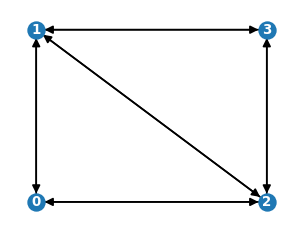

In [13]:
# konwersja grafu nieskierowanego do skierowanego 
H=nx.to_directed(G)

nx.draw_networkx(H,pos,labels,node_size=100,
                 font_color='white',font_weight='bold',font_size=8)
plt.axis('off');                  

## Mosty królewieckie

Utwórzmy graf mostów królewieckich z **rys. [5.5]**. Ponieważ występują tu krawędzie wielokrotne, stosujemy funkcję **MultiGraph**.

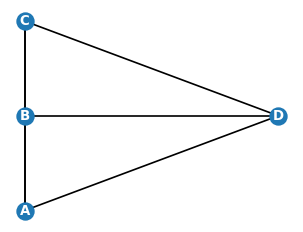

In [14]:
G = nx.MultiGraph()  # multigraf dla przypadku wielokrotnych krawędzi 

G.add_node('A',label='A',pos=(0,-1))  # dodaj wierzchołki
G.add_node('B',label='B',pos=(0,0))
G.add_node('C',label='C',pos=(0,1))
G.add_node('D',label='D',pos=(1,0))

G.add_edge('A','B')  # dodaj krawędzie
G.add_edge('B','A')
G.add_edge('C','B')
G.add_edge('B','C')
G.add_edge('A','D')
G.add_edge('B','D')
G.add_edge('C','D')

pos=nx.get_node_attributes(G,'pos')
nx.draw_networkx(G,pos,node_size=100,
                 font_color='white',font_weight='bold',font_size=8)
plt.axis('off');

```{admonition} Krawędzie wielokrotne
:class: note

Powyżej niestety nie widać krawędzi wielokrotnych, które się nakładają, z czym **networkx** ma kłopoty! 
```

Rozwiązaniem jest rysowanie krawędzi wg przepisu 3 ze strony
https://www.py4u.net/discuss/22430 od użytkownika [atomh33ls](https://stackoverflow.com/users/1461850/atomh33ls). Aby go zrozumieć, zobaczmy najpierw, jak **MultiGraph** reprezentuje krawędzie:

In [15]:
list(G.edges)

[('A', 'B', 0),
 ('A', 'B', 1),
 ('A', 'D', 0),
 ('B', 'C', 0),
 ('B', 'C', 1),
 ('B', 'D', 0),
 ('C', 'D', 0)]

Każda krawędź jest krotką, np. ('A', 'B', 0). Widzimy, że w przypadku krawędzi wielokrotnych są one rozróżniane elementem numer 2 krotki, który w naszym konkretnym przypadku przyjmuje wartości 0 lub 1. W szczególności, mamy dwie krawędzie od A do B: ('A', 'B', 0) oraz ('A', 'B', 1). Idea poniższego przepisu jest taka, by krzywizna krawędzi zależała od jej numeru.  

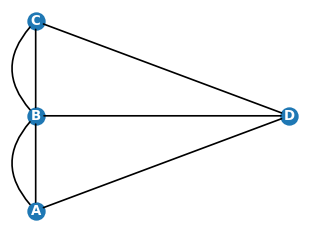

In [16]:
nx.draw_networkx_nodes(G, pos, node_size = 100) # narysuj wierzchołki

labels = nx.get_node_attributes(G,'label')      # etykiety wierzchołków
nx.draw_networkx_labels(G,pos,labels,font_color='white',font_weight='bold',font_size=8)

for e in G.edges:   # pętla po krawędziach
    plt.annotate("",
            xy=pos[e[0]], xycoords='data',
            xytext=pos[e[1]], textcoords='data',
            arrowprops=dict(arrowstyle="-", color="black",
                        shrinkA=5, shrinkB=5,
                        patchA=None, patchB=None,
                        # krzywizna jest proporcjonalna do e[2]
                        connectionstyle="arc3,rad=rrr".replace('rrr',str(0.5*e[2])
                        ),
                        ),
            )
    
plt.axis('off');

Poniżej kilka definicji z **rozdz. [5.1]** w zastowaniu do grafu mostów królewieckich:

In [17]:
list(nx.degree(G))  # stopnie wierzchołków

[('A', 3), ('B', 5), ('C', 3), ('D', 3)]

In [18]:
A=nx.adjacency_matrix(G) # macierz sąsiedztwa
print(A) # format dla tzw. macierzy rzadkiej

# nr wierzchołków  liczba krawędzi

  (0, 1)	2
  (0, 3)	1
  (1, 0)	2
  (1, 2)	2
  (1, 3)	1
  (2, 1)	2
  (2, 3)	1
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1


In [19]:
a = A.todense() # macierz sąsiedztwa w postaci zwykłej tablicy
print(a)

[[0 2 0 1]
 [2 0 2 1]
 [0 2 0 1]
 [1 1 1 0]]


In [20]:
list(nx.generate_adjlist(G)) # listy incydencji (Uwaga! Inna konwencja niż w książce)

['A B B D', 'B C C D', 'C D', 'D']

In [21]:
nx.is_eulerian(G) # graf oczywiście nie jest eulerowski

False

Można utworzyć graf z listy incydencji:

In [22]:
K=nx.MultiGraph()

K = nx.from_numpy_matrix(a, parallel_edges = True, create_using = nx.MultiGraph())

# dodajemy jeszcze 2 krawędzie
K.add_edge(0,1)
K.add_edge(1,2)

print(list(nx.edges(K)))

[(0, 1), (0, 1), (0, 1), (0, 3), (1, 2), (1, 2), (1, 2), (1, 3), (2, 3)]


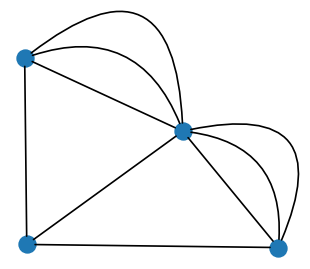

In [23]:
pos=nx.spring_layout(K)   # ustawienie pozycji wierzchołków w spring_layout
nx.draw_networkx_nodes(K, pos, node_size = 100) # narysuj wierzchołki

for e in K.edges:   # pętla po krawędziach, jak w poprzednim prtzykładzie
    plt.annotate("",
            xy=pos[e[0]], xycoords='data',
            xytext=pos[e[1]], textcoords='data',
            arrowprops=dict(arrowstyle="-", color="black",
                        shrinkA=5, shrinkB=5,
                        patchA=None, patchB=None,
                        connectionstyle="arc3,rad=rrr".replace('rrr',str(0.5*e[2])
                        ),
                        ),
            )
    
plt.axis('off');

Ponieważ stopnie dokładnie dwóch wierzchołków są nieparzyste, zgodnie z wnioskami **[5.1]** i **[5.2]** graf $K$ nie jest eulerowski, ale jest półeulerowski:

In [24]:
list(nx.degree(K))    # stopnie wierzchołków

[(0, 4), (1, 7), (2, 4), (3, 3)]

In [25]:
nx.is_eulerian(K)     # graf K nie jest eulerowski

False

In [26]:
nx.is_semieulerian(K) # ... ale jest półeulerowski

True

A oto droga Eulera (zaczyna się w wierzchołku 3 i kończy w wierzchołku 1, gdzie obydwa są stopnia nieparzystego):

In [27]:
list(nx.eulerian_path(K))

[(3, 2), (2, 1), (1, 2), (2, 1), (1, 3), (3, 0), (0, 1), (1, 0), (0, 1)]

## Kalejdoskop grafów 

Bez trudu możemy wygenerować różne typowe grafy, zob. **rozdz. [5.3]**:

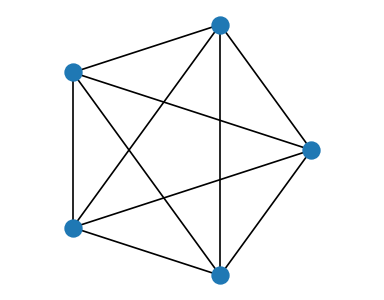

In [28]:
K5 = nx.complete_graph(5) # graf pełny
nx.draw_circular(K5,node_size=100)
plt.axis('equal');

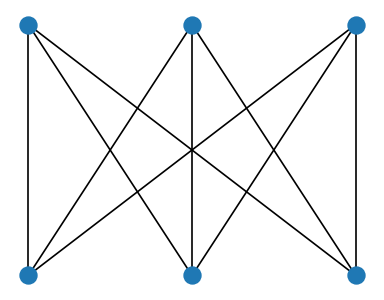

In [29]:
K33 = nx.complete_bipartite_graph(3,3) # graf dwudzielny pełny

# położenia wierzchołków zadane z pomocą słownika
posi = {0:[-1,1], 1:[0,1], 2:[1,1], 3:[-1,-1], 4:[0,-1], 5:[1,-1]}
nx.draw(K33,posi,node_size=100)

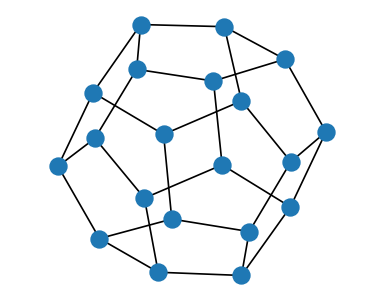

In [30]:
H = nx.dodecahedral_graph() # graf platoński (12-ścian foremny)
nx.draw(H,node_size=100)
plt.axis('equal');

Graf $H$ jest regularny (stopień każdego wierzchołka jest taki sam i wynosi 3):

In [31]:
print(list(nx.degree(H)))

[(0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (13, 3), (14, 3), (15, 3), (16, 3), (17, 3), (18, 3), (19, 3)]


## Badanie grafu

Poniższa funkcja podaje podstawowe informacje o grafie:

In [32]:
def graf_info(G): 
    st=str(type(G))
    print("Liczba wierzchołków: ", int(G.number_of_nodes())) 
    print("Liczba krawędzi: ", int(G.number_of_edges())) 
    print("Lista wierzchołków: ", list(G.nodes())) 
    print("Lista krawędzi: ", list(G.edges())) 
    if "Di" not in st: # dla grafu 
        print("Stopnie całkowite wierzchołków: ", dict(G.degree())) 
    if "DiGraph" in st:
        print("Stopnie wejściowe wierzchołków: ", dict(G.in_degree())) 
        print("Stopnie wyjściowe wierzchołków: ", dict(G.out_degree())) 

Możemy badać różne typy grafów. Poniższą analizę należy powtórzyć dla wszystkich możliwości: 

- graf nieskierowany prosty (**Graph**)

- graf nieskierowany z możliwymi krawędziami wielokrotnymi i pętlami (**MultiGraph**)

- graf skierowany prosty (**DiGraph**)

- graf skierowany z możliwymi krawędziami wielokrotnymi i pętlami (**MultiDiGraph**)

In [33]:
G=nx.Graph()
# G=nx.MultiGraph()
# G=nx.DiGraph()
# G=nx.MultiDiGraph()

```{admonition} Automatyczne dodawanie wierzchołków
:class: note
        
Przy dodawaniu krawędzi, wierzchołki na ich końcach dodają się automatycznie, więc nie musimy wykonywać polecenia G.add_nodes(...)
```

In [34]:
# Tworzymy graf z wagami, nazwanymi 'dist'
G.add_weighted_edges_from([
    # dodajemy krawędź między wierzchołkami 1 i 2 o wadze 7
    (1, 2, 7), 
    # dodajemy ponownie krawędź między wierzchołkami 1 i 2, tym razem o wadze 3
    # MultiGraph/MultiDiGraph ją uwzględniają, Graph/DiGraph ignorują 
    # rysunek ignoruje krawędzie wielokrotne
    (1, 2, 3), 
    # dodajemy krawędź między wierzchołkami 2 i 1 o wadze 1
    # MultiGraph, DiGraph, MultiDiGraph uwzględniają, Graph ignoruje
    (2, 1, 1), 
    # dodajemy pętlę, rysunek ignoruje pętle
    (6, 6, 3), 
    # pozostałe wierzchołki
    (2, 4, 15),
    (4, 5, 6),
    (5, 6, 9),
    (6, 1, 14),
    (1, 3, 9),
    (2, 3, 10),
    (3, 4, 11),
    (3, 6, 2),
], weight='dist')


graf_info(G)

Liczba wierzchołków:  6
Liczba krawędzi:  10
Lista wierzchołków:  [1, 2, 6, 4, 5, 3]
Lista krawędzi:  [(1, 2), (1, 6), (1, 3), (2, 4), (2, 3), (6, 6), (6, 5), (6, 3), (4, 5), (4, 3)]
Stopnie całkowite wierzchołków:  {1: 3, 2: 3, 6: 5, 4: 3, 5: 2, 3: 4}


```{admonition} Schematy rozłożenia wierzchołków
:class: note

Możemy wybrać różne schematy rozłożenia wierzchołków (sprawdź po kolei poszczególne możliwości).

```

In [35]:
nodePos = nx.spring_layout(G)
# nodePos = nx.kamada_kawai_layout(G)
# nodePos = nx.random_layout(G)
# nodePos = nx.shell_layout(G)
# nodePos = nx.circular_layout(G)
# nodePos = nx.spectral_layout(G)

Jesteśmy gotowi narysować nasz graf!

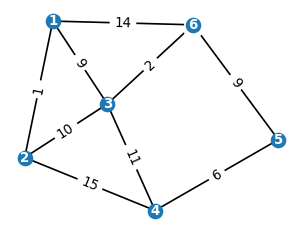

In [36]:
label_weight=nx.get_edge_attributes(G,'dist') # etykiety krawędzi
nx.draw_networkx(G, pos=nodePos, with_labels=True, font_size=8, font_color='white', 
                 font_weight='bold',node_size=70)

# rysowanie etykiet krawędzi nie działa dla MultiGraph i MultiDiGraph
if 'Multi' not in str(type(G)):
    nx.draw_networkx_edge_labels(G, pos=nodePos, edge_labels=label_weight,font_size=8);

plt.axis('off');

Możemy badać wiele innych cech grafu, np.

In [37]:
# sąsiedzi wskazanego wierzchołka
print("Lista wierzchołków osiągalnych z 1 w pojedynczym kroku:", list(G.neighbors(1))) 

Lista wierzchołków osiągalnych z 1 w pojedynczym kroku: [2, 6, 3]


In [38]:
list(nx.find_cliques(G)) # kliki

[[3, 1, 2], [3, 1, 6], [3, 4, 2], [5, 4], [5, 6]]

In [39]:
nx.is_biconnected(G)  # dwuspójność, tj. trzeba przeciąć min 2 krawędzie, by rozspójnić

True

## Algorytmy na grafach

### Przeszukiwanie wszerz

Poniżej autorski algorytm **[5.3]** przeszukiwania grafu wszerz. Algorytm sprawdza też, czy graf jest spójny i w tym przypadku zwraca drzewo spinające grafu. Jeśli graf nie jest spójny, zwracane jest drzewo spinające części spójnej zawierającej wierzchołek startowy. 

In [ ]:
def wszerz(GG,deb=False):
    """
    przesukiwanie wszerz
    
    input: 
      GG  - graf w formacie networkx 
      deb - boolean, kontrola wydruku 
           
    output: 
      GG spójny - drzewo spinające 
      GG niespójny - drzewo spinające części spójnej zawierającej wierzchołek startowy
    """

    G=GG.copy()         # kopia grafu (będzie "psuta")    
    T=nx.Graph()        # zainicjalizuj puste drzewo spinające
    V=list(nx.nodes(G)) # lista wierzchołków nieodwiedzonych 
    V2=[]               # pusta lista wierzchołków odwiedzonych
    
    V2.append(V.pop(0)) # przenieś wierzchołek 0 z nieodwiedzonych do odwiedzonych

    if len(V) == 0:     # specjalny przypadek, gdy G ma tylko jeden wierzchołek    
        if deb:
            print('jeden wierzchołek')
        T.add_nodes_from(V2)
        return T

    lv=len(V) # obecna liczba wierzchołków nieodwiedzonych    
    lv2=lv+1  # cokolwiek innego od lv, by poniższa pętla ruszyła

    while len(V)>0 and lv != lv2: # wykonuj, dopóki są wierzchołki nieodwiedzone 
                                  # i ich liczba się zmienia, tj. lv != lv2  

        lv=lv2             # obecna liczba wierzchołków lv nieodwiedzonych = poprzedniej
        VV2=V2.copy()      # skopiuj listę nieodwiedzonych

        for v2 in VV2:     # pętla po wierzchołkach odwiedzonych
            VV=V.copy()    # skopiuj listę nieodwiedzonych
            
            for v in VV:   # pętla po wierzchołkach nieodwiedzonych      
                if (v2, v) in G.edges(): # jeśli odwiedzony i nieodwiedzony sąsiadują
                    V.remove(v)   # przenieś wierzchołek z nieodwiedzonych 
                    V2.append(v)  # do odwiedzonych
                    G.remove_edge(v2,v)  # usuń krawędź z grafu
                    T.add_edge(v2,v)     # i dodaj ją do drzewa
                    lv2=lv-1             # liczba nieodwiedzonych zmniejsza się o 1

# To się wykona, jeśli graf jest niespójny. Wówczas lv się nie zmienia, a istnieją nieodwiedzone!                    
    if len(V)>0:
        if deb:
            print('niespójny!')
    
    return T 

Test algorytmu na przykładowym grafie:

In [97]:
G = nx.Graph()

# G.add_nodes_from([0])

G.add_nodes_from([0,1,2,3,4,5,6,7,8,9,'A','B','C','r'])
G.add_edges_from([(0,0),(1,3),(3,1),(5,0),(5,'A'),
                  (2,3),(4,3),(2,4),(7,4),(7,4),(6,9),(5,8),(0,1),(0,9),(0,9),(1,9),('B','C'),(7,8)])

H=G.copy()
T=wszerz(H,True)

niespójny!


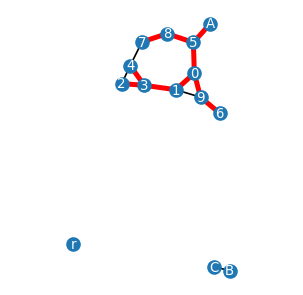

In [98]:
plt.figure(figsize=(3,3))
nodePos = nx.spring_layout(H)
nx.draw_networkx(H, pos=nodePos, with_labels=True, 
                 node_size=60,font_color='white',font_size=8)
nx.draw_networkx_edges(T, pos=nodePos,edge_color='r',width=3)

plt.axis('equal')
plt.axis('off');

Widzimy uzyskane drzewo spinające, oznaczone na czerowno, dla składowej spójnej grafu zawierajacej wierzchołek startowy 0. 

Możemy teraz łatwo utworzyć funcję sprawdzającą ile spójnych składowych ma graf.

In [99]:
def ile_skl(GG):
    
    G=GG.copy()  # skopiuj graf, bo będzie się zmieniać  
    i=0          # początkowa liczba składowych grafu
    
    while nx.number_of_nodes(G)>0: # wykonuj, dopóki G jest niepusty
        T=wszerz(G)
        G.remove_nodes_from(T) # usuń uzyskane drzewo z grafu 
        i=i+1                  # liczba składowych wzrasta o 1
        
    print('liczba składowych spójnych:',i)    
    return i                   # ostateczna liczba składowych

In [100]:
ile_skl(G)

liczba składowych spójnych: 3


3

Podobnie, możemy uzyskać las drzew spinających, sumując drzewa spinające poszczególnych składowych spójnych grafu:

In [101]:
def las(GG):
    G=GG.copy()  # skopiuj graf, bo będzie się zmieniać  
    L=nx.Graph() # las
    i=0          # początkowa liczba składowych grafu

    while nx.number_of_nodes(G)>0: # wykonuj, dopóki G jest niepusty
        T=wszerz(G)
        G.remove_nodes_from(T)     # usuń uzyskane drzewo z grafu 
        L=nx.union(L,T)            # dodaj drzewo T do lasu L
        i=i+1                      # liczba składowych wzrasta o 1
    print('liczba składowych spójnych:',i)    
    return L     # las spinający 

In [102]:
lasek=las(G)
graf_info(lasek)

liczba składowych spójnych: 3
Liczba wierzchołków:  14
Liczba krawędzi:  11
Lista wierzchołków:  [0, 1, 5, 9, 3, 8, 'A', 6, 2, 4, 7, 'B', 'C', 'r']
Lista krawędzi:  [(0, 1), (0, 5), (0, 9), (1, 3), (5, 8), (5, 'A'), (9, 6), (3, 2), (3, 4), (8, 7), ('B', 'C')]
Stopnie całkowite wierzchołków:  {0: 3, 1: 2, 5: 3, 9: 2, 3: 3, 8: 2, 'A': 1, 6: 1, 2: 1, 4: 1, 7: 1, 'B': 1, 'C': 1, 'r': 0}


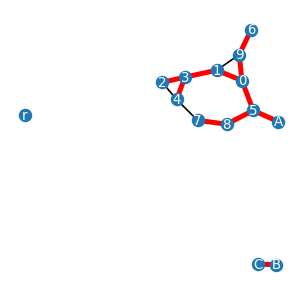

In [107]:
plt.figure(figsize=(3, 3))

nodePos = nx.spring_layout(G)
nx.draw_networkx(G, pos=nodePos, with_labels=True, 
                 node_size=50,font_color='white',font_size=8)
nx.draw_networkx_edges(lasek, pos=nodePos,edge_color='r',width=3)

plt.axis('equal')
plt.axis('off');

### Algorytmy wbudowane w networkx

```{admonition} Algorytmy **networkx**
:class: note

Biblioteka **networkx** zawiera wiele standardowych algorytmów działających na grafach. Są one "profesjonalne" i należy ich używać, gdy tylko możliwe. Powyższy algorytm "autorski" miał na celu pokazanie, że algorytmy na grafach i implementujące je programy są w istocie proste i łatwo je zrozumieć. 
```

Utwórzmy przykładowy graf skierowany i przeszukajmy go w głąb i wszerz:

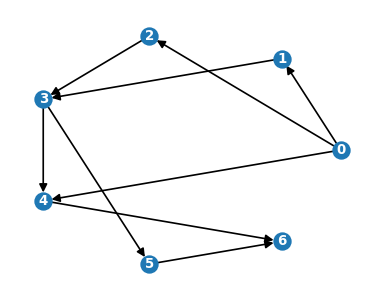

In [108]:
G = nx.DiGraph()

G.add_nodes_from([0, 1, 2, 3, 4, 5, 6])
G.add_edges_from([
    (0, 1),
    (0, 2),
    (0, 4),
    (1, 3),
    (2, 3),
    (3, 4),
    (3, 5),
    (4, 6),
    (5, 6),
])

nodePos = nx.circular_layout(G)

nx.draw(G, with_labels=True,pos=nodePos, font_color='white', font_weight='bold',
       node_size=100,font_size=8)

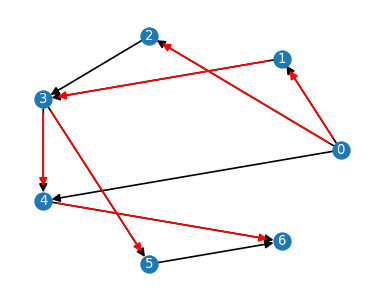

In [111]:
# przeszukiwanie w głąb
T = nx.depth_first_search.dfs_tree(G, 0)
nx.draw(G, with_labels=True,pos=nodePos,node_size=100,font_color='white',font_size=8)
nx.draw_networkx_edges(T, pos=nodePos,edge_color='r');

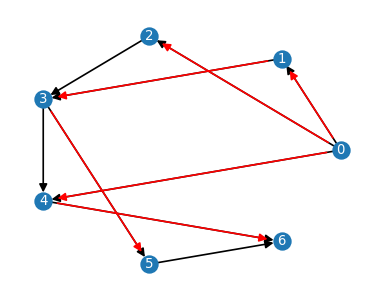

In [110]:
# przeszukiwanie wszerz
T = nx.breadth_first_search.bfs_tree(G, 0)
nx.draw(G, with_labels=True,pos=nodePos,node_size=100,font_color='white',font_size=8)
nx.draw_networkx_edges(T, pos=nodePos,edge_color='r');

Możemy łatwo sprawdzić na powyższych rysunkach realizację **alg. [5.2]** i **[5.3]**.

Kolejne algorytmy dotyczą grafów z wagami, **rozdz. [5.8]**. Tworzymy zatem przykładowy graf z wagami i znajdujemy najkrótszą ścieżkę między dwoa wierzchołkami:

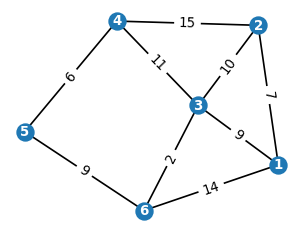

In [124]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6])
G.add_weighted_edges_from([         # krawędzie z wagami
    (1, 2, 7),
    (2, 4, 15),
    (4, 5, 6),
    (5, 6, 9),
    (6, 1, 14),
    (1, 3, 9),
    (2, 3, 10),
    (3, 4, 11),
    (3, 6, 2),
], weight='dist')

nodePos = nx.spring_layout(G)
label_weight=nx.get_edge_attributes(G,'dist')

nx.draw_networkx(G, pos=nodePos, with_labels=True, 
                 node_size=100,font_color='white',font_size=8,font_weight='bold')
nx.draw_networkx_edge_labels(G, pos=nodePos, edge_labels=label_weight,font_size=8)
plt.axis("off");

In [125]:
# najkrótsza ścieżka między wierzchołkami 1 i 5
P = nx.shortest_path(G, 1, 5, weight='dist')
print(P)

[1, 3, 6, 5]


In [126]:
# sumaryczna waga (długość) najkrótszej ścieżki
print(nx.shortest_path_length(G, 1, 5, weight='dist'))

20


In [127]:
# najkrótszą ścieżkę oznaczymy na czerwono
red_edges = list(zip(P,P[1:])) # zip stwarza odpowiednią krotkę
print(red_edges)

[(1, 3), (3, 6), (6, 5)]


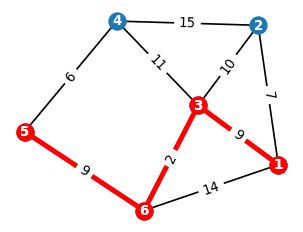

In [128]:
sh=nx.Graph()         # graf dla najkrótsza ścieżka
sh.add_nodes_from(P)
sh.add_edges_from(red_edges)
nx.draw_networkx(G, pos=nodePos, with_labels=True,
                node_size=100,font_color='white',font_size=8,font_weight='bold')
nx.draw_networkx_edge_labels(G, pos=nodePos, edge_labels=label_weight,font_size=8)
nx.draw_networkx(sh, pos=nodePos,node_color='r',
                node_size=100,font_color='white',font_size=8,font_weight='bold')
nx.draw_networkx_edges(sh, pos=nodePos, edge_color='r',width=3)
plt.axis("off");

Grafy napotykane w "codziennym życiu" są na ogół bardzo duże (zob. wstęp  **rozdz. [5]**). Poniżej przykład działania algorytmu znajdowania najkrótszej ścieżki dla dużego geometrycznego grafu losowego.

W konstrukcji geometrycznego grafu losowego umieszcza się jednorodnie losowo $n$ wierzchołków w kwadracie $[0,1]\times[0,1]$. Dwa wierzchołki są łączone krawędzią, jeśli ich odległość jest mniejsza niż pewna zadana odległość $d$  


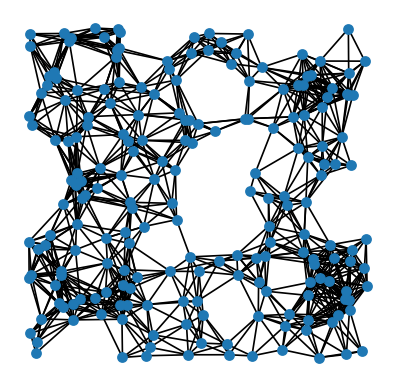

In [251]:
# geometryczny graf losowy, n=200, d=0.15
G = nx.random_geometric_graph(200, 0.15)
pos = nx.get_node_attributes(G, 'pos')

plt.figure(figsize=(4,4))
nx.draw_networkx(G, pos=pos, with_labels=False,node_size=30)
plt.axis('off');

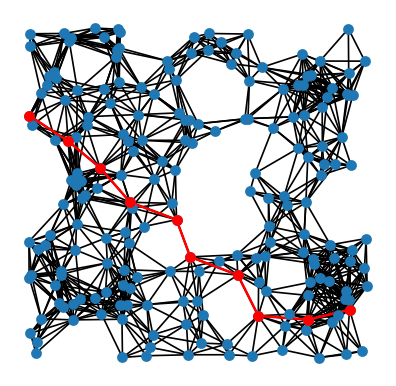

In [256]:
# najkrótsza ścieżka między wierzchołkami 1 i 50
P = nx.shortest_path(G, 1, 80)

red_edges = list(zip(P,P[1:]))

plt.figure(figsize=(4,4))
sh=nx.Graph()
sh.add_nodes_from(P)
sh.add_edges_from(red_edges)
nx.draw_networkx(G, pos=pos, with_labels=False,node_size=30)
nx.draw_networkx(sh, pos=pos,node_color='r',node_size=30,with_labels=False)
nx.draw_networkx_edges(sh, pos=pos, edge_color='r',width=1.5)

plt.axis('off');

In [161]:
ile_skl(G)

liczba składowych spójnych: 1


1

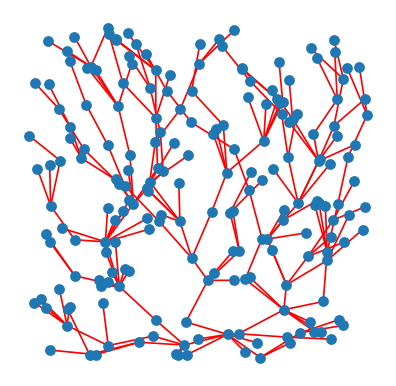

In [154]:
# drzewo spinające
T=wszerz(G)

plt.figure(figsize=(4,4))
#nx.draw_networkx(G, pos=pos, with_labels=False, node_size=30)
nx.draw_networkx(T, pos=pos, with_labels=False, node_size=30, edge_color='r')
plt.axis('off');

```{admonition} Średnica grafu
:class: note

Średnica grafu to maksimum po wszystkich parach wierzchołków z ich najkrótszej odległości.
```

In [163]:
# średnica grafu (działa tylko dla grafu spójnego)
nx.diameter(G)

11

```{admonition} Klika
:class: note

Klika to podgraf pełny - kazdy zna każdego!
```

In [164]:
# największa klika
kli=list(nx.enumerate_all_cliques(G))[-1] # ostatni element listy klik
len(kli)

12

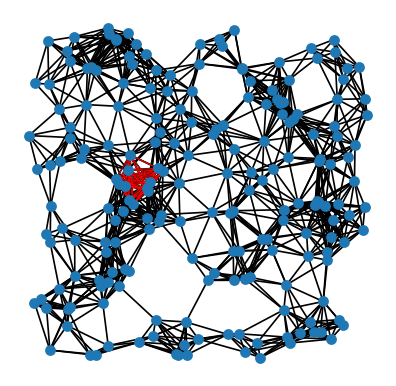

In [168]:
plt.figure(figsize=(4,4))
nx.draw_networkx(G, pos, with_labels=False, node_size=30)
nx.draw_networkx(G.subgraph(kli),  pos, with_labels=False, node_size=8, 
                 edge_color='r',width=0.5)
plt.axis("off");

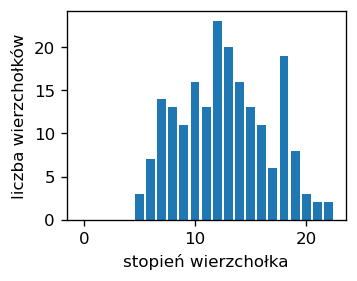

In [171]:
kG=nx.degree_histogram(G) # histogram stopni wierzchołków
plt.xlabel('stopień wierzchołka')
plt.ylabel('liczba wierzchołków')

plt.bar(range(len(kG)), kG);

## Grafy z zewnętrznych danych

Częstokroć pragniemy zanalizowac dane z pomocą grafów. Dane są zebrane w plikach, więc pierwszym zadaniam jest wczytanie je w odpowiedni format grafu. Poniżej przedstawiamy dwa popularne przykłady.

### Sioux Falls

Ten przykład zaczerpniety jest ze strony https://github.com/bstabler/TransportationNetworks/tree/master/SiouxFalls i dotyczy optymalizacji transportu w amerykańskim mieście Sioux Falls. Plik z danymi dot. położenia wierzchołków (skrzyżowań ulic) ma format

gdzie $X$ i $Y$ są geograficznymi współrzędnymi. Wczytanie wierzchołków odbywa się nastepująco:

In [192]:
S=nx.Graph() # inicjalizacja grafu

In [193]:
f = open("SiouxFalls/SiouxFalls_node.tntp", "r")
line = f.readline()           # opuść pierwszą linię
line = f.readline()
while len(line)-1:            # jeśli linia nie jest pusta
    line = line.strip(';')    # usuń znak;
    l = line.split()          # utwórz z linii tablicę
    node = int(l[0])          # nr wierzchołka
    pos1 = float(l[1])/10000  # współrzędna x przeskalowana
    pos2 = float(l[2])/10000  # współrzędna y przeskalowana
    S.add_node(node, pos=(pos1,pos2)) # dodaj wierzchołek do grafu
    line = f.readline()       # przeczytaj nową linię
f.close()

print("liczba wierzchołków:", S.number_of_nodes())

liczba wierzchołków: 24


Format pliku z krawędziami ma postać 

gdzie pierwsze dwie kolumny podają wskaźniki wierzchołków, trzecia (Volume Capacity) to przepustowość komunikacyjna (w setkach samochodów na dobę) - tej wielkości nie używamy, a czwarta to koszt przejazdu. 

In [194]:
f = open("SiouxFalls/SiouxFalls_flow.tntp", "r")
line = f.readline()
line = f.readline()
while len(line)-1:
    l = line.split()
    fromnode = int(l[0])
    to = int(l[1])
    volume = float(l[2])
    cost = int(float(l[3]))
    S.add_edge(fromnode, to, weight = cost) # dodaj krawędź do grafu, waga to koszt
    line = f.readline()
f.close()

print("liczba krawędzi:", S.number_of_edges())

liczba krawędzi: 38


Mając zbudowany graf w oparciu o dane, możemy analizować go ptrzy pomocy posiadanych narzędzi, w szczególności możemy z pomocą wbudowanego algorytmu Dijkstry (zob. **alg. [5.6]**) znaleźć najkrótszą drogę między dwoma wybranymi wierzchołkami:

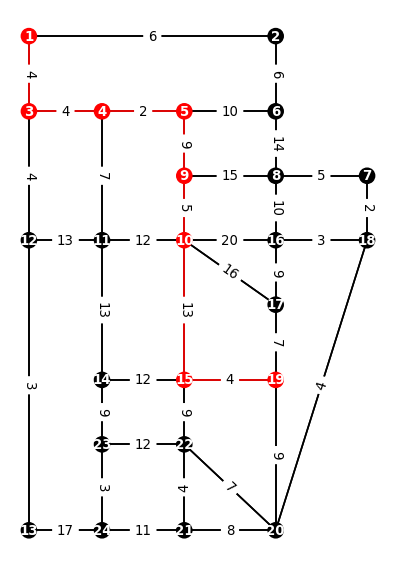

In [212]:
node_pos=nx.get_node_attributes(S,'pos')         # położenia wierzchołków
arc_weight=nx.get_edge_attributes(S,'weight')    # wagi krawędzi 
sp = nx.dijkstra_path(S,source = 1, target = 19) # najkrótsza droga od 1 do 19
red_edges = list(zip(sp,sp[1:]))                 # lista czerwonych krawędzi
node_col = ['black' if not node in sp else 'red' for node in S.nodes()]
            # czerwony kolor dla wierchołków na najkrótszej ścieżce, czarny poza
edge_col = ['black' if not edge in red_edges else 'red' for edge in S.edges()]
            # czerwony kolor dla krawędzi na najkrótszej ścieżce, czarny poza

# rysunek, jak w uprzednich przypadkach 
plt.figure(figsize=(4,6)) 
nx.draw_networkx(S, node_pos,node_color= node_col, 
                 node_size=80,font_size=8,font_color="white",font_weight='bold')
nx.draw_networkx_edges(S, node_pos,edge_color= edge_col)
nx.draw_networkx_edge_labels(S, node_pos, edge_labels=arc_weight,font_size=8)
plt.axis('off');

In [213]:
# najkrótsza ścieżka od 1 do 19
sp

[1, 3, 4, 5, 9, 10, 15, 19]

In [214]:
print("koszt całkowity wzdłóż optymalnej ścieżki:", 
                nx.dijkstra_path_length(S, 1, 19, 'weight'))

koszt całkowity wzdłóż optymalnej ścieżki: 41


### Sieci społeczne

Drugi przykład pochodzi ze strony https://www.datacamp.com/community/tutorials/social-network-analysis-python i dotyczy sieci społaeczne **facebook**. Wierzchołkami są osoby, które są połączone krawędzią jeśli są znajomymi. Plik z danymi ma bardzo prosty format, gdzie każda linia to para znajmych:  

Osoba 16 zna osobe 329 itd. W tym przypadku możemy bardzo łatwo utworzyć graf poprzez instrukcję

In [215]:
G_fb=nx.read_edgelist("fb/facebook_combined.txt", 
                      create_using = nx.Graph(), nodetype=int)

In [216]:
print(nx.info(G_fb))  # zwięzła informacja o grafie

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


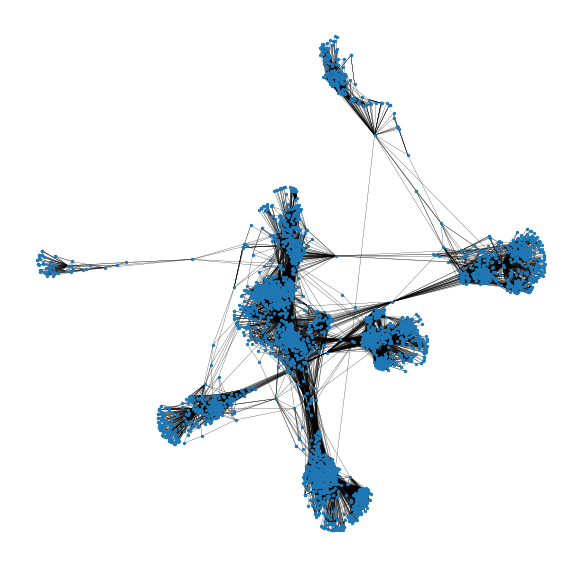

In [221]:
pos = nx.spring_layout(G_fb)
plt.figure(figsize=(6,6))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,node_size=1,width=0.15)
plt.axis('off');

Zwróćmy uwagę na kilka wierzchołków o stosunkowo bardzo wysokim stopniu:

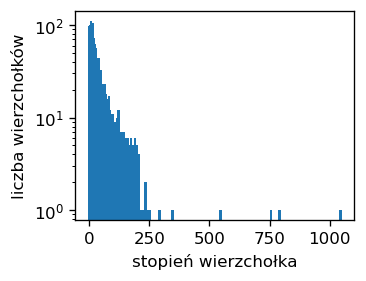

In [222]:
Gh=nx.degree_histogram(G_fb)
plt.xlabel('stopień wierzchołka')
plt.ylabel('liczba wierzchołków')
plt.bar(range(len(Gh)), Gh,log=True, width=10);

## Kolorowanie grafów

Kolorowanie wierchołkowe grafów, opisane w **rozdz. [5.12]**, uzyskujemy dzieki funcji **equitable_color** z biblioteki **networkx**:

In [226]:
G=nx.dodecahedral_graph()                # przykładowy graf
kolo=nx.equitable_color(G, num_colors=4) # kolorowanie wierzchołków
kolo_list=list(kolo.values())
print(kolo)
print("")
print(kolo_list)

{0: 0, 1: 3, 2: 0, 3: 1, 4: 2, 5: 1, 6: 2, 7: 1, 8: 0, 9: 3, 10: 2, 11: 3, 12: 2, 13: 1, 14: 0, 15: 3, 16: 0, 17: 1, 18: 2, 19: 3}

[0, 3, 0, 1, 2, 1, 2, 1, 0, 3, 2, 3, 2, 1, 0, 3, 0, 1, 2, 3]


Wynikiem algorytmu jest słownik kolorów, numerowanych 0, 1, 2, ..., który skonwertowaliśmy na listę. Możemy wskaźnikom 0, 1, 2, ... przydzielić konkretne kolory: 

In [227]:
colors=['red','blue','green','black','gray','brown','pink','yellow','orange','magenta']

Możemy teraz ładnie narysować pokolorowany graf:

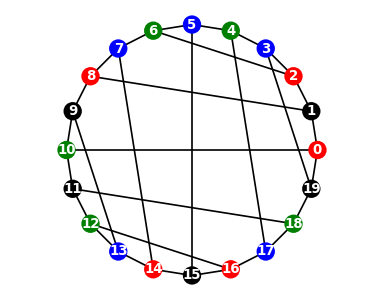

In [230]:
cmap=[colors[kolo_list[i]] for i in range(len(kolo_list))]
nx.draw_circular(G, node_color = cmap, node_size=100,with_labels=True, 
                 font_color='white', font_weight='bold',font_size=8)

plt.axis('equal')  # zachowaj proporcje osi x i y
plt.axis('off');

## Przepływ w sieci

Do znajdowania maksymalnego przepływu w sieci o zadanych przepustowościach (zob. **rozdz. [5.19]**) służy funkcja **maximum_flow** z biblioteki **networkx**. Utwórzmy przykładową sieć:

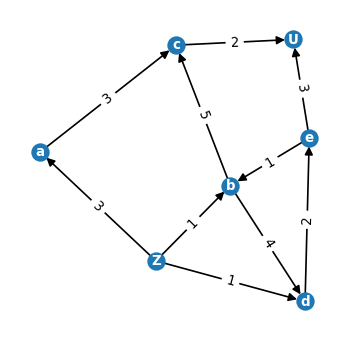

In [233]:
G = nx.DiGraph()

G.add_edge('Z','a', capacity=3)
G.add_edge('Z','b', capacity=1)
G.add_edge('Z','d', capacity=1)
G.add_edge('a','c', capacity=3)
G.add_edge('b','c', capacity=5)
G.add_edge('b','d', capacity=4)
G.add_edge('d','e', capacity=2)
G.add_edge('c','U', capacity=2)
G.add_edge('e','U', capacity=3)
G.add_edge('e','b', capacity=1)

label_cap=nx.get_edge_attributes(G,'capacity') # etykieta krawędzi = przepustowość
nodePos = nx.spring_layout(G)

plt.figure(figsize=(3.5,3.5))
nx.draw_networkx(G, pos=nodePos, node_size=100, with_labels=True, font_color='white', 
                 font_weight='bold',font_size=8)
nx.draw_networkx_edge_labels(G, pos=nodePos, edge_labels=label_cap,font_size=8);
plt.axis('off');

Zajdujemy teraz maksymalny przepływ między źródłem $Z$ i ujściem $U$:

In [241]:
flow_value, flow_dict = nx.maximum_flow(G, 'Z', 'U')  # maksymalny przepływ
print("maksymalny przepływ:", flow_value)
print("")
print(flow_dict)

maksymalny przepływ: 4

{'Z': {'a': 2, 'b': 1, 'd': 1}, 'a': {'c': 2}, 'b': {'c': 0, 'd': 1}, 'd': {'e': 2}, 'c': {'U': 2}, 'e': {'U': 2, 'b': 0}, 'U': {}}


Należy teraz przekształcić powyższy słownik na graf, co czynimy w nastepujacy sposób:

In [236]:
tab=[]
F=nx.DiGraph()
for v in flow_dict:
    for w in flow_dict.get(v):
        tab.append((v,w,flow_dict.get(v).get(w)))

F.add_weighted_edges_from(tab)

Możemy teraz narysować sieć z maksymalnym przepływem. Czarne etykiety oznaczają przepustowość krawedzi, a czerwone maksymalny przepływ.

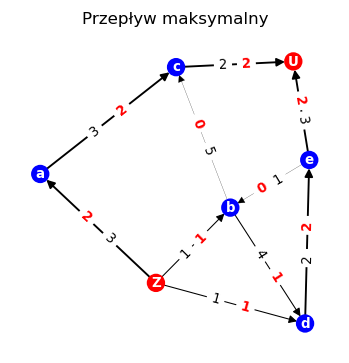

In [238]:
label_fl=nx.get_edge_attributes(F,'weight')   # etykiety maksymalnego przepływu

wid=[(1.5*i+0.4)/3 for i in list(nx.get_edge_attributes(F,'weight').values())]
                                   # szerokość linii proporcjnalna do przepływu
# kolory dla wierzchołków
color_map = []
for node in G:
    if node == 'Z' or node == 'U':
        color_map.append('red')
    else: 
        color_map.append('blue') 
        
plt.figure(figsize=(3.5,3.5))        
nx.draw_networkx(G, pos=nodePos, node_color = color_map, node_size=100, with_labels=True, 
                 font_color='white', font_weight='bold',font_size=8, width=wid)
nx.draw_networkx_edge_labels(G, pos=nodePos, edge_labels=label_cap, label_pos=0.6,
                             font_size=8);
nx.draw_networkx_edge_labels(F, pos=nodePos, edge_labels=label_fl,label_pos=0.4,
                             font_color='red', font_weight='bold',font_size=8);

plt.title('Przepływ maksymalny',size=10)
plt.axis('off');

Znajdziemy teraz minimalny przekrój (por. **tw. [5.31]**):

In [242]:
mc=nx.minimum_cut(G, 'Z','U', capacity='capacity')
print(mc)
minp=mc[0]

(4, ({'a', 'Z', 'c', 'd', 'b'}, {'e', 'U'}))


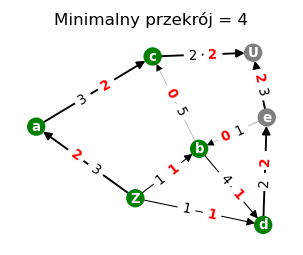

In [243]:
# kolory dla wierzchołków
color_map = []
for node in G:
    if node in mc[1][0]:
        color_map.append('green')
    else: 
        color_map.append('gray') 
         
nx.draw_networkx(G, pos=nodePos, node_color = color_map, node_size=100, with_labels=True, 
                 font_color='white', font_weight='bold', font_size=8, width=wid)
nx.draw_networkx_edge_labels(G, pos=nodePos, edge_labels=label_cap, 
                             label_pos=0.6, font_size=8);
nx.draw_networkx_edge_labels(F, pos=nodePos, edge_labels=label_fl,
                label_pos=0.4,font_color='red', font_size=8,font_weight='bold');

plt.title('Minimalny przekrój = '+str(mc[0]),size=10)
plt.axis('off');

Wszystko się zgadza: maksymalny przepływ równa sie minimalnemu przekrojowi!

## Drzewo Steinera

```{admonition} Uwaga! 
:class: warning

Jest to inna koncepcja drzewa Steinera niż w książce. Nie szukamy tu położenia dodatkowych wierzchołków Steinera.
```

```{admonition} Problem drzewa Steinera
:class: note 

W spójnym grafie G z ustalonymi wagami szukamy minimalnego drzewa S zawierającego wszystkie zadane wierzchołki "terminalowe" T należące do G.
``

waga drzewa Steinera: 1.8


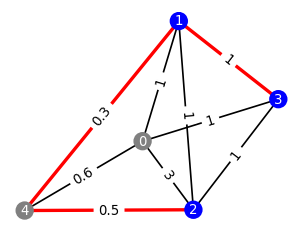

In [244]:
# przykładowy graf z wagami
G=nx.Graph()

G.add_weighted_edges_from([
    (0, 1, 1),
    (0, 2, 3),
    (0, 3, 1),
    (1, 2, 1),
    (1, 3, 1),
    (2, 3, 1),
    (4, 2, 0.5),
    (4, 1, 0.3),
    (4, 0, 0.6)
])

# atrybuty
pos = nx.spring_layout(G)
weights = nx.get_edge_attributes(G,'weight')
labels = nx.get_node_attributes(G,'label')

T=[3,2,1] # wierzchołki "terminalowe" (drzewo S z definicji musi je zawierać)

# drzewo Steinera (uwaga: działa tyko dla grafów nieskierowanych)
S=nalg.steiner_tree(G, T ,weight='weight')

# kolory dla wierzchołków terminalowych
color_map = []
for node in G:
    if node in T:
        color_map.append('blue')
    else: 
        color_map.append('gray') 
        
nx.draw_networkx(G,pos,with_labels=True,node_size=100,font_color='white', 
                 node_color = color_map,font_size=8)
nx.draw_networkx_edge_labels(G,pos,edge_labels=weights,font_size=8);
nx.draw_networkx_edges(S,pos,edge_color='r',width=2)

le=0
for e in S.edges:
    le+=S.get_edge_data(*e)['weight'] # * zwraca tzw. "tuple form"
print("waga drzewa Steinera:", le)

plt.axis('off');

Powyżej widzimy, że drzewo Steinera S (czerwone krawędzie) zawiera wierzchołki terminalowe T (niebieskie) oraz dodatkowy wierzchołek 4. Jest to korzystne, bo droga z 1 do 2 jest krótsza przez 4, gdzie 0.3+0.5=0.8, niż bezpośrednio, gdzie wynosi 1.

## Zadania

1. Narysuj średniej wielkości (ok. 10 wierzchołków i 20-30 krawędzi) graf spójny $G$ na kartce papieru. Przydziel etykiety wierzchołkom i "wprowadź graf do komputera". Narysuj graf.

2. Znajdź mininalne drzewo spinające grafu $G$.

3. Przydziel wagi krawędziom grafu $G$ i znajdź najkrótszą drogę między wybraną parą wierchołków. 

4. Potraktuj wagi krawędzi $G$ jako przepustowości sieci i znajdź maksymalny przepływ między dwoma wierzchołkami. 

5. Zbadaj własności grafu **G = nx.random_geometric_graph(200, d)** w zależności od $d \in (0,1)$, tj. spójność, liczbę krawędzi, rozmiar najwiekszej kliki. 